In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset=pd.read_csv('./Jan_2019_ontime.csv')
dataset.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [ ]:
dataset['DAY_OF_MONTH'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
dataset['DAY_OF_WEEK'].unique()

array([2, 3, 4, 5, 6, 7, 1])

In [ ]:
dataset.shape

(583985, 22)

In [ ]:
dataset.nunique()

DAY_OF_MONTH               31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
OP_CARRIER                 17
TAIL_NUM                 5446
OP_CARRIER_FL_NUM        6839
ORIGIN_AIRPORT_ID         346
ORIGIN_AIRPORT_SEQ_ID     346
ORIGIN                    346
DEST_AIRPORT_ID           346
DEST_AIRPORT_SEQ_ID       346
DEST                      346
DEP_TIME                 1438
DEP_DEL15                   2
DEP_TIME_BLK               19
ARR_TIME                 1440
ARR_DEL15                   2
CANCELLED                   2
DIVERTED                    2
DISTANCE                 1451
Unnamed: 21                 0
dtype: int64

In [ ]:
dataset.isna().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                   2543
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                  16352
DEP_DEL15                 16355
DEP_TIME_BLK                  0
ARR_TIME                  17061
ARR_DEL15                 18022
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              583985
dtype: int64

In [ ]:
dataset['DEP_DEL15'].unique()

array([ 0.,  1., nan])

In [ ]:
dataset.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [ ]:
cols_to_fill_zero=['TAIL_NUM','DEST','DEP_TIME','DEP_DEL15','ARR_TIME','ARR_DEL15','CANCELLED','DIVERTED','DISTANCE']
dataset[cols_to_fill_zero]=dataset[cols_to_fill_zero].fillna(0)
dataset.isna().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                      0
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                      0
DEP_DEL15                     0
DEP_TIME_BLK                  0
ARR_TIME                      0
ARR_DEL15                     0
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              583985
dtype: int64

In [ ]:
dataset['DEP_DEL15'] = dataset['DEP_DEL15'].astype('int64')
dataset['ARR_DEL15']= dataset['ARR_DEL15'].astype('int64')
dataset['ARR_TIME']= dataset['ARR_TIME'].astype('int64')
dataset['DEP_TIME']= dataset['DEP_TIME'].astype('int64')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               583985 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               583985 non-null  int64  
 14  DEP_DEL15              583985 non-nu

In [ ]:
dataset.isna().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                      0
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                      0
DEP_DEL15                     0
DEP_TIME_BLK                  0
ARR_TIME                      0
ARR_DEL15                     0
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              583985
dtype: int64

In [ ]:
dataset['OP_UNIQUE_CARRIER'].value_counts()

WN    111312
AA     77017
DL     73836
OO     64926
UA     46915
YX     25755
MQ     25699
B6     24443
OH     23169
AS     20744
9E     20198
YV     18346
NK     15222
EV     13195
F9      9647
HA      6798
G4      6763
Name: OP_UNIQUE_CARRIER, dtype: int64

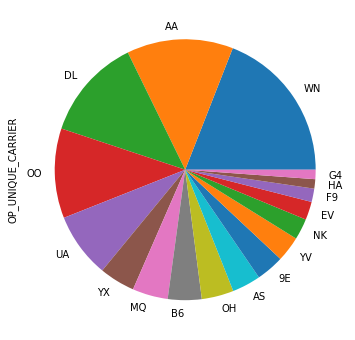

In [ ]:
dataset['OP_UNIQUE_CARRIER'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0.5, 1.0, 'Total number of flights in the month')

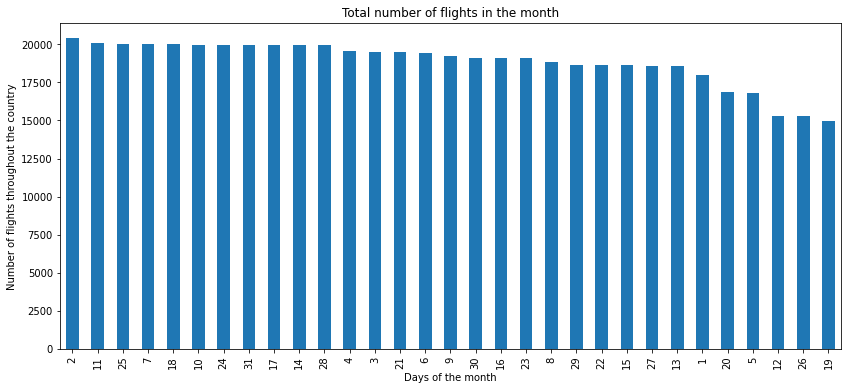

In [ ]:
dataset['DAY_OF_MONTH'].value_counts().plot(kind='bar', figsize=(14,6))
plt.ylabel("Number of flights throughout the country")
plt.xlabel("Days of the month")
plt.title("Total number of flights in the month")


Text(0.5, 1.0, 'Total number of flights in the week')

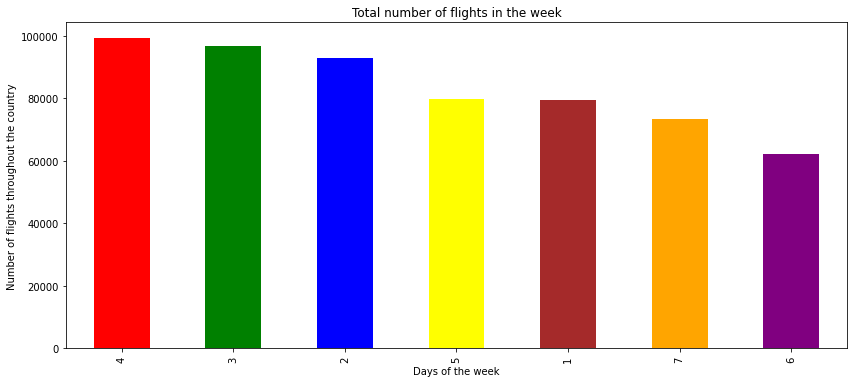

In [ ]:
colorss='red','green','blue','yellow','brown','orange','purple'
dataset['DAY_OF_WEEK'].value_counts().plot(kind='bar', color=colorss, figsize=(14,6))
plt.ylabel("Number of flights throughout the country")
plt.xlabel("Days of the week")
plt.title("Total number of flights in the week")

In [ ]:
columns= ['OP_CARRIER_AIRLINE_ID','DEST_AIRPORT_ID', 'ORIGIN_AIRPORT_ID']
le=LabelEncoder()
for i in columns:
     dataset[i]=le.fit_transform(dataset[i])

In [ ]:
dataset['OP_CARRIER_AIRLINE_ID'].unique()

array([ 7,  3, 12,  9, 11, 13, 10,  8, 15, 16,  1, 14,  6,  0,  4,  5,  2])

In [ ]:
dataset['ORIGIN_AIRPORT_ID'].unique()

array([128, 226,  95, 326,  19,  85, 168, 190, 169,  38,  56, 251, 170,
        11, 193, 161, 110,  55,  81, 329,  41, 210, 204, 214, 333, 120,
        32, 253,  80, 137, 295,  39, 287, 189, 224,  94, 107,   0,  87,
        53, 159, 337, 188,  66, 102, 108, 250, 302,  79, 331,  26,  89,
       277, 271, 257,  78, 129,  60, 236, 154, 274, 288, 133,  50, 177,
       230,  10,  61,  62, 149, 240, 221, 150, 203,  49, 181, 239, 252,
       213,  69, 298, 296, 317,  68, 179, 231,  51, 117, 306,  12, 270,
       309, 212, 328, 100, 233, 145, 227, 156, 175,  88, 286, 332, 304,
       247, 311, 131, 307, 113, 109, 167, 202, 259, 103,  21,   2, 266,
       207, 248,   5,   1,  93, 134,  33,  23,  67,  63,  77, 132,  25,
       336, 112, 135, 208,  14, 324, 228, 180, 343,  70, 211, 299,  22,
        24, 249, 297, 315, 255,  37, 246,  36, 174, 290,  31, 118, 155,
       158,  34, 125, 268, 216, 327, 229, 220, 148, 114, 325,  17, 152,
       191, 279, 284, 281, 147, 320, 238,  52, 323,  83,  44, 26

In [ ]:
dataset['DEST_AIRPORT_ID'].unique()

array([ 19,  80, 120, 226, 190,  38,  85,  95, 277, 109,  11, 230, 128,
       110,  81,  55, 210,  39, 194, 333, 253,  32,  23, 177, 337, 257,
       169, 137,  41, 224, 170,  94, 107, 204, 236,  22, 302, 159, 108,
       136, 274, 188,   0, 295, 229, 270, 325,  79, 102, 150, 331, 130,
       326,  78, 329, 193, 133, 161, 129, 134,  60, 154, 168, 281, 328,
        66,  10,  51,  61,  53,  50, 149, 250,  62, 240, 288, 287, 181,
       304,  89, 239, 296, 252, 213, 251, 298, 317,  68, 306,  87, 203,
       332,  12, 117,  21, 100, 145, 233, 156, 179, 175, 227, 286, 248,
        40,  20, 314, 307, 113, 167, 202, 259, 103, 311,   2, 135,  88,
       279, 212,   1,  93,  69,  33,  67,  13, 322, 299,  63,  77, 132,
        25, 336, 343, 112, 208,  14, 228, 180,  56,   5, 189, 207,  49,
       119,  36, 249,  34, 209, 297, 121, 187, 290, 255, 269, 327,  31,
       341, 246, 262, 315, 266, 106, 125,  37,  24, 155, 268, 174, 217,
       148, 216,  83, 114, 220,  26,  17, 152, 247, 191, 231, 30

In [ ]:
dataset.head(10)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,7,9E,N8688C,3280,128,1195302,GNV,19,1039707,ATL,601,0,0600-0659,722,0,0.0,0.0,300.0,NaN
1,1,2,9E,7,9E,N348PQ,3281,226,1348702,MSP,80,1119302,CVG,1359,0,1400-1459,1633,0,0.0,0.0,596.0,NaN
2,1,2,9E,7,9E,N8896A,3282,95,1143302,DTW,80,1119302,CVG,1215,0,1200-1259,1329,0,0.0,0.0,229.0,NaN
3,1,2,9E,7,9E,N8886A,3283,326,1524906,TLH,19,1039707,ATL,1521,0,1500-1559,1625,0,0.0,0.0,223.0,NaN
4,1,2,9E,7,9E,N8974C,3284,19,1039707,ATL,120,1177801,FSM,1847,0,1900-1959,1940,0,0.0,0.0,579.0,NaN
5,1,2,9E,7,9E,N927EV,3285,85,1126702,DAY,226,1348702,MSP,853,0,0900-0959,953,0,0.0,0.0,574.0,NaN
6,1,2,9E,7,9E,N915XJ,3286,168,1244807,JAN,19,1039707,ATL,1553,0,1500-1559,1832,0,0.0,0.0,341.0,NaN
7,1,2,9E,7,9E,N295PQ,3287,190,1295304,LGA,80,1119302,CVG,1551,0,1500-1559,1824,0,0.0,0.0,585.0,NaN
8,1,2,9E,7,9E,N337PQ,3288,169,1245102,JAX,190,1295304,LGA,1037,0,1000-1059,1239,0,0.0,0.0,833.0,NaN
9,1,2,9E,7,9E,N311PQ,3289,19,1039707,ATL,38,1068502,BMI,1245,0,1200-1259,1318,0,0.0,0.0,533.0,NaN


In [ ]:
y=dataset['DEP_DEL15']

In [ ]:
dataset['DEP_DEL15']=dataset['DEP_DEL15'].fillna(dataset.DEP_DEL15.mean())
dataset['ARR_DEL15']=dataset['ARR_DEL15'].fillna(dataset.ARR_DEL15.mean())
dataset.isna().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                      0
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                      0
DEP_DEL15                     0
DEP_TIME_BLK                  0
ARR_TIME                      0
ARR_DEL15                     0
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              583985
dtype: int64

In [ ]:
dataset = dataset[["DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "DEP_TIME", "ARR_DEL15"]]
dataset.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,ARR_DEL15
0,1,2,GNV,ATL,601,0
1,1,2,MSP,CVG,1359,0
2,1,2,DTW,CVG,1215,0
3,1,2,TLH,ATL,1521,0
4,1,2,ATL,FSM,1847,0


In [ ]:
dataset.isna().sum()

DAY_OF_MONTH    0
DAY_OF_WEEK     0
ORIGIN          0
DEST            0
DEP_TIME        0
ARR_DEL15       0
dtype: int64

In [ ]:
dataset = pd.get_dummies(dataset, columns=['ORIGIN', 'DEST'])
dataset.head()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,ARR_DEL15,ORIGIN_ABE,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ALO,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ART,ORIGIN_ASE,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_AZA,ORIGIN_AZO,ORIGIN_BDL,ORIGIN_BET,ORIGIN_BFF,ORIGIN_BFL,ORIGIN_BGM,ORIGIN_BGR,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BJI,...,DEST_SLC,DEST_SLN,DEST_SMF,DEST_SMX,DEST_SNA,DEST_SPI,DEST_SPN,DEST_SPS,DEST_SRQ,DEST_STC,DEST_STL,DEST_STS,DEST_STT,DEST_STX,DEST_SUN,DEST_SUX,DEST_SWF,DEST_SWO,DEST_SYR,DEST_TLH,DEST_TOL,DEST_TPA,DEST_TRI,DEST_TTN,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TWF,DEST_TXK,DEST_TYR,DEST_TYS,DEST_UIN,DEST_USA,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_YAK,DEST_YUM
0,1,2,601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,1359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,1215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2,1521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2,1847,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y= train_test_split(dataset.drop('ARR_DEL15', axis=1), dataset['ARR_DEL15'], test_size=0.2, random_state=42)

In [ ]:
train_X.shape

(467188, 695)

In [ ]:
test_X.shape

(116797, 695)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=13)
model.fit(train_X, train_Y)

RandomForestClassifier(random_state=13)

In [ ]:
predicted = model.predict(test_X)
model.score(test_X, test_Y)

0.8431295324366208

In [ ]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_X)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_Y, predicted)

array([[92132,  3678],
       [14644,  6343]])

In [ ]:
from sklearn.metrics import precision_score
train_predictions = model.predict(train_X)
precision_score(train_Y, train_predictions)

0.9995244209825462

In [ ]:
from sklearn.metrics import recall_score
recall_score(train_Y, train_predictions)

0.9980174511782514